In [124]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.operations import SymmOp
import matplotlib.pyplot as plt
import matplotlib.image as img

In [125]:
with MPRester("TcDpUTe7wLxFMs0t") as m:
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-675349")


In [126]:
structure

Structure Summary
Lattice
    abc : 4.09842299 4.098423147892949 6.41445601
 angles : 90.0 90.0 119.99999864488029
 volume : 93.3091092444826
      A : 4.09842299 0.0 0.0
      B : -2.04921149 3.54933861 0.0
      C : 0.0 0.0 6.41445601
PeriodicSite: Dy (0.0000, 0.0000, 3.2751) [0.0000, 0.0000, 0.5106]
PeriodicSite: Cu (2.0492, 1.1831, 0.8507) [0.6667, 0.3333, 0.1326]
PeriodicSite: Se (-0.0000, 2.3662, 1.5062) [0.3333, 0.6667, 0.2348]
PeriodicSite: Se (2.0492, 1.1831, 4.7985) [0.6667, 0.3333, 0.7481]

In [127]:
SGA = SpacegroupAnalyzer(structure)
SO = SGA.get_symmetry_operations()
SO 

[Rot:
 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]
 tau
 [0. 0. 0.], Rot:
 [[ 0. -1.  0.]
  [ 1. -1.  0.]
  [ 0.  0.  1.]]
 tau
 [0. 0. 0.], Rot:
 [[-1.  1.  0.]
  [-1.  0.  0.]
  [ 0.  0.  1.]]
 tau
 [0. 0. 0.], Rot:
 [[ 0. -1.  0.]
  [-1.  0.  0.]
  [ 0.  0.  1.]]
 tau
 [0. 0. 0.], Rot:
 [[-1.  1.  0.]
  [ 0.  1.  0.]
  [ 0.  0.  1.]]
 tau
 [0. 0. 0.], Rot:
 [[ 1.  0.  0.]
  [ 1. -1.  0.]
  [ 0.  0.  1.]]
 tau
 [0. 0. 0.]]

In [128]:
#nous donne les nouvelles coordonnées de l'atome sur lequel on effectue l'opération de symétrie
 SymCu = SO[1].operate([0.6667, 0.3333, 0.1326]) 
 SymSe1 = SO[2].operate([0.3333, 0.6667, 0.2348]) 
 SymSe2 = SO[3].operate([0.6667, 0.3333, 0.7481]) 

Première opération de symétrie: Rotation d'ordre 3 autour du vecteur de base C, appliquée sur l'atome Cu situé en  [0.6667, 0.3333, 0.1326]


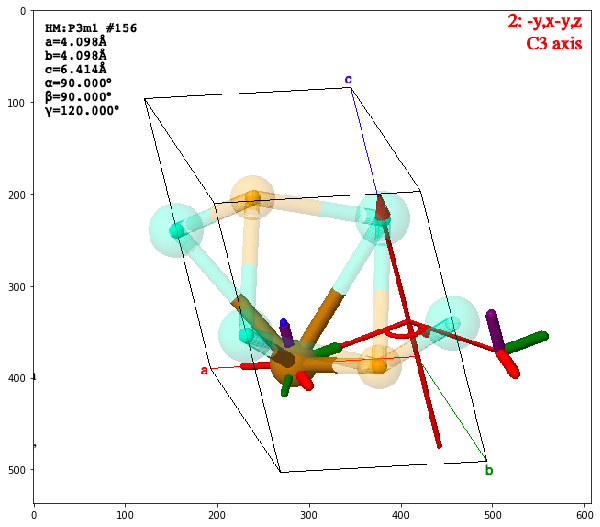

Apres l'operation de symétrie l'atome de Cu se retrouve à la position [-0.3333  0.3334  0.1326]
Les matrice de rotation et de translation sont
Rot:
[[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]
La matrice de rotation peut également s'exprimer sous la forme
-y, x-y, z


In [129]:
print("Première opération de symétrie: Rotation d'ordre 3 autour du vecteur de base C, appliquée sur l'atome Cu situé en  [0.6667, 0.3333, 0.1326]")
plt.figure(figsize = (10,10))
plt.imshow(img.imread('SymmetrieCu.png'))
plt.show()
print("Apres l'operation de symétrie l'atome de Cu se retrouve à la position", SymCu)
print("Les matrice de rotation et de translation sont")
print(SO[1])
print ("La matrice de rotation peut également s'exprimer sous la forme")
print(SO[1].as_xyz_string())


Deuxième opération de symétrie: Rotation d'ordre 3 autour du vecteur de base C, appliquée sur l'atome Se situé en  [0.3333, 0.6667, 0.2348]


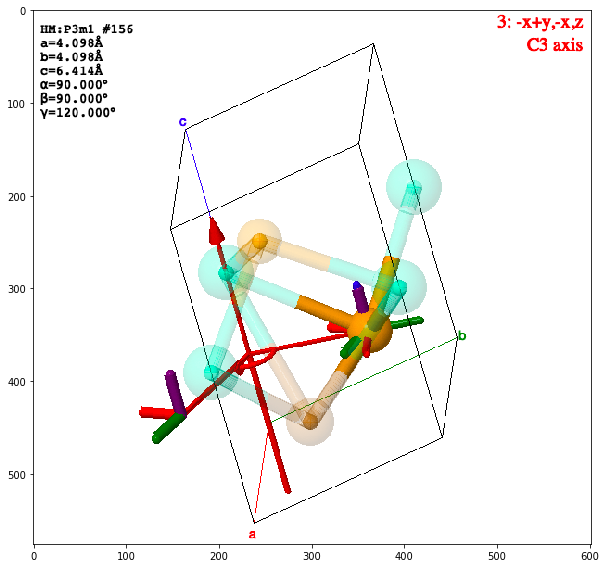

Apres l'operation de symétrie l'atome de Se se retrouve à la position [ 0.3334 -0.3333  0.2348]
Les matrice de rotation et de translation sont
Rot:
[[-1.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]
La matrice de rotation peut également s'exprimer sous la forme
-x+y, -x, z


In [130]:
print("Deuxième opération de symétrie: Rotation d'ordre 3 autour du vecteur de base C, appliquée sur l'atome Se situé en  [0.3333, 0.6667, 0.2348]")
plt.figure(figsize = (10,10))
plt.imshow(img.imread('SymmetrieSe1.png'))
plt.show()
print("Apres l'operation de symétrie l'atome de Se se retrouve à la position", SymSe1)
print("Les matrice de rotation et de translation sont")
print(SO[2])
print ("La matrice de rotation peut également s'exprimer sous la forme")
print(SO[2].as_xyz_string())

Troisième opération de symétrie: Reflexion par rapport à un plan mirroir, appliquée sur l'atome Se situé en            [0.6667, 0.3333, 0.7481]


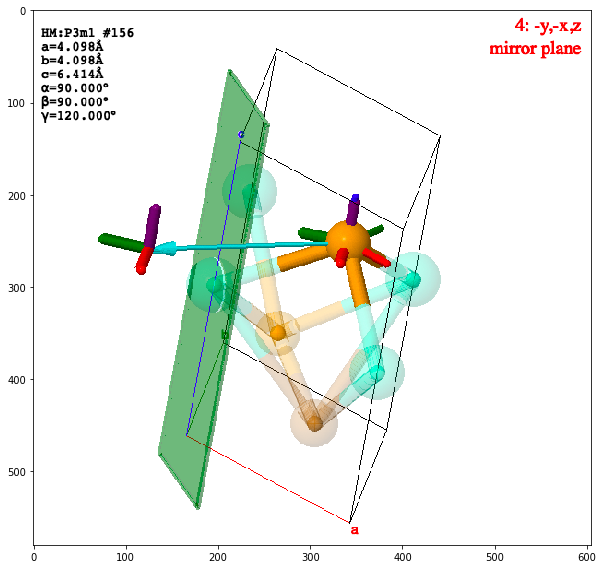

Apres l'operation de symétrie, l'atome de Se se retrouve à la position [-0.3333 -0.6667  0.7481]
Les matrice de rotation et de translation sont
Rot:
[[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]
La matrice de rotation peut également s'exprimer sous la forme
-y, -x, z


In [131]:
print("Troisième opération de symétrie: Reflexion par rapport à un plan mirroir, appliquée sur l'atome Se situé en            [0.6667, 0.3333, 0.7481]")
plt.figure(figsize = (10,10))
plt.imshow(img.imread('SymmetrieSe2.png'))
plt.show()
print("Apres l'operation de symétrie, l'atome de Se se retrouve à la position", SymSe2)
print("Les matrice de rotation et de translation sont")
print(SO[3])
print ("La matrice de rotation peut également s'exprimer sous la forme")
print(SO[3].as_xyz_string())